**1(a)**

Here is the image content converted to LaTeX format:

\begin{align*}
&\text{Let $X$ be a random variable with the parameters $n$, $p$. Then under the following} \\
&\text{conditions $X$ tends to Poisson distribution:} \\
&\quad 1) \quad n,p^{-1} \to \infty \\
&\quad 2) \quad \lambda = np \to \text{constant} \\
&\text{Now, } \quad b(x; n, p) = \quad \binom{n}{x} p^x q^{n-x} \quad \therefore \quad p = \frac{\lambda}{n} \quad \& \quad q = 1 - \frac{\lambda}{n}\\
&\text{Then, } \quad b(x; n, p) = \binom{n}{x} \left(\frac{\lambda}{n}\right)^{x} \left(1 - \frac{\lambda}{n}\right)^{n-x}\\
&\quad = \frac{n(n-1) \cdots (n-x+1)}{x!} \quad \frac{\lambda^x}{n^x} \left(1 - \frac{\lambda}{n}\right)^{n-x} \\
&\quad = 1 \cdot \left(1 - \frac{\lambda_n}{n}\right) \left(1 - \frac{2}{n}\right) \cdots \left(1 - \frac{x-1}{n}\right) \lambda^x \frac{(1 - \frac{\lambda}{n})^n}{(1 - \frac{\lambda}{n})^x} \frac{1}{x!} \\
&\therefore \quad \lim_{n \to \infty} b(x; n, p) = \quad \frac{\lambda^x}{x!} \cdot e^{-\lambda} = e^{-\lambda} \lambda^x \quad \therefore \quad X \to p(\lambda)
\end{align*}

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
import seaborn as sns

In [56]:
def rms_error(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

In [57]:
n = 1000
p = 0.01
lam = 10

x_values = np.arange(0, 30)
binomial_probs = np.array([binom.pmf(x, n, p) for x in x_values])
poisson_probs = np.array([poisson.pmf(x, lam) for x in x_values])

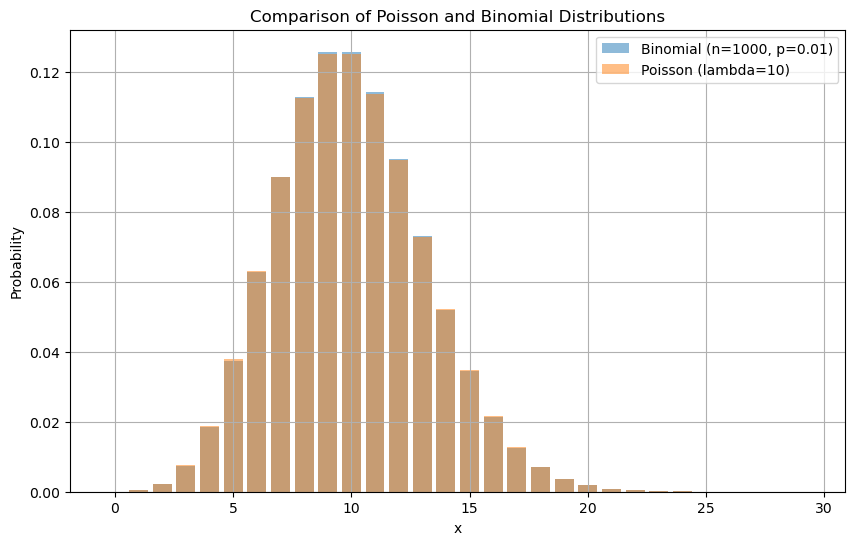

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(x_values, binomial_probs, label='Binomial (n={}, p={})'.format(n, p), alpha=0.5)
plt.bar(x_values, poisson_probs, label='Poisson (lambda={})'.format(lam), alpha=0.5)
plt.title('Comparison of Poisson and Binomial Distributions')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

**1(b)**

In [59]:
def plot_n_err(n,p):
    lam = n*p
    x_values = np.arange(0, 20)
    y_tru = np.array([binom.pmf(x, n, p) for x in x_values])
    y_pred= np.array([poisson.pmf(x, lam) for x in x_values])
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_tru, label='Binomial (n={}, p={})'.format(n, p), alpha=0.5)
    plt.bar(x_values, y_pred, label='Poisson (lambda={})'.format(lam), alpha=0.5)
    plt.title('Comparison of Poisson and Binomial Distributions')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

    rmse = rms_error(y_pred, y_tru)
    print(lam)
    print("Root Mean Square Error:", rmse)

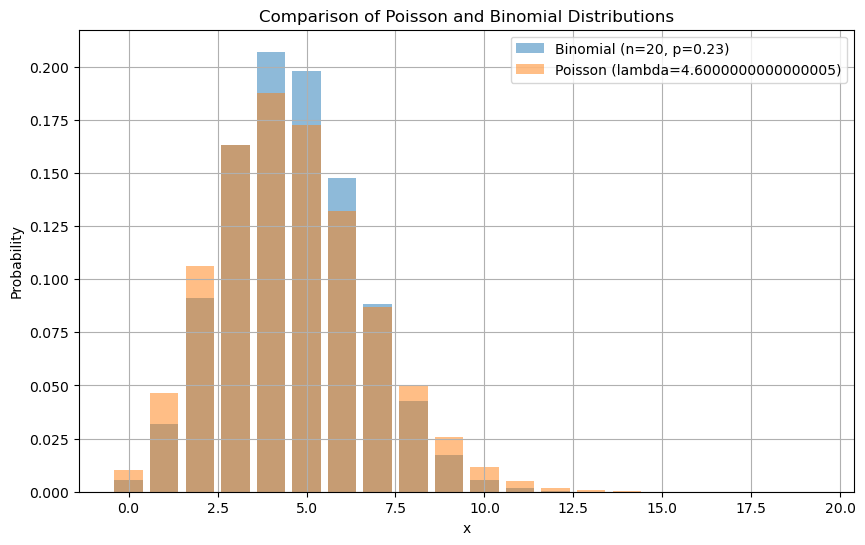

4.6000000000000005
Root Mean Square Error: 0.009746956007480781


In [60]:
plot_n_err(20,0.23)

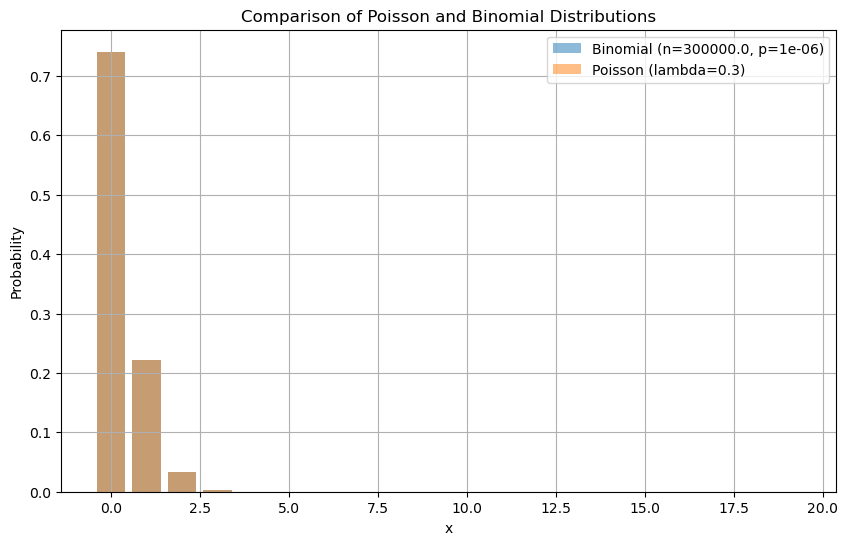

0.3
Root Mean Square Error: 5.053026257673285e-08


In [61]:
plot_n_err(3*1e5,1e-6)

From the above two graphs we can infer that if $\lambda = 4 $ there is a relatively high error but when $\lambda = 0.3 << 5$ we get a pretty accurate approximation

**Q2**
\begin{align*}
W &= X+XY+Y \\
Z &= XY^2+X^3Y \\
E[X] &= E\left[E(X|Y)\right] = E\left[XE(Y|X)\right] = E\left[X\cdot sX\right] \\
\text{As} \quad Y&|X \sim N(sX, 1-s^2) \\
\therefore E[XY] &= sE[X^2] = s \\
E[X^2Y] &= E[X^2E(Y|X)] = E[sX^3] = s\cdot 0 = 0 \\
E[XY^2] &= E\left[E(XY^2|Y)\right] = E\left[Y^2E(X|Y)\right] = sE(Y^3) = 0 \\
\therefore E[X^3Y] &= E\left[E(X^3Y|X)\right] = E\left[X^3E(Y|X)\right] = sE(X^4)= 3s \\
E(w)E(Z) &= (s+0+0)(3s+3s) = 6s^2 \\
WZ &= (XY+XY+XY^2)(XY^2+X^3Y) \\
&= X^2Y^4+X^4Y^2+X^3Y^4+X^3Y^3+X^3Y^2+X^4Y^3 \\
E[X^2Y^4] &= E\left[Y^4E[X^2|Y]\right] \\
X|Y &\sim N(sY,1-s^2) \\
E[X^2|Y] &= Var(X|Y) + \left(E[X|Y]\right)^2 \\
&= (1-s^2+s^2Y^2) = 1+s^2(Y^2-1) \\
\therefore E[X^2Y^4] &= E\left[Y^4+s^2Y^4-Y^6 s^2\right] \\
&= E[Y^4]+s^2E[Y^4]-s^2E[Y^6] \\
&= 3+s^2(3)-s^2 15 \\
&= 3-12s^2 \\
E[X^4Y^2] &= 3-12s^2 \\
\therefore E[WZ] &= 2(3-12s^2) = 6-24s^2 \\
Cov(W,Z) &= 6-24s^2-6s^2 = 6-30s^2
\end{align*}

**Q3**
\begin{align*}
&\text{We know that} \quad E(X_n) = \mu \quad \text{and} \quad \text{Var}(X_n) = \frac{\sigma^{2}}{n} \quad \text{Then, by Chebyshev's inequality}\\
&P(|X_n - \mu| \le \epsilon) = P\left(\left|X_n - \mu\right| < \frac{\epsilon}{\frac{\sigma}{\sqrt{n}}} \cdot \frac{\sigma}{\sqrt{n}} \right) \ge \left(1 - \frac{1}{{\left(\frac{\epsilon}{\frac{\sigma}{\sqrt{n}}}\right)}^{2}}\right)\\
&\text{Choose } n > \frac{\sigma^2}{\epsilon^2 \delta} \quad (\text{by WLLN})\\
&\implies \delta \ge \frac{\sigma^2}{n \epsilon^2}\\
&\therefore P(|X_n - \mu| \le \epsilon) \ge 1 - \frac{\sigma^2}{n \epsilon^2}\\
&\therefore \lim_{n \to \infty} P(|X_n - \mu| < \epsilon) \to 1\\
&\implies \lim_{n \to \infty} P(|X_n - \mu| \ge \epsilon) \to 0
\end{align*}


**Q4**

My enrollment number is: $23112009$. Hence, the distribution will be as follows
\
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
X & 0 & 1 & 2 & 3 & 9\\
\hline
P(X=x) & \frac{0}{18} & \frac{2}{18} & \frac{4}{18} & \frac{3}{18} & \frac{9}{18} \\
\hline
\end{array}



In [67]:
X = [0,1,2,3,9]
p = [0,0.11,0.22,0.17,0.5]
samples = np.random.choice(X, size=10000, p=p)
avg = sum(samples)/10000
print(avg)

5.549


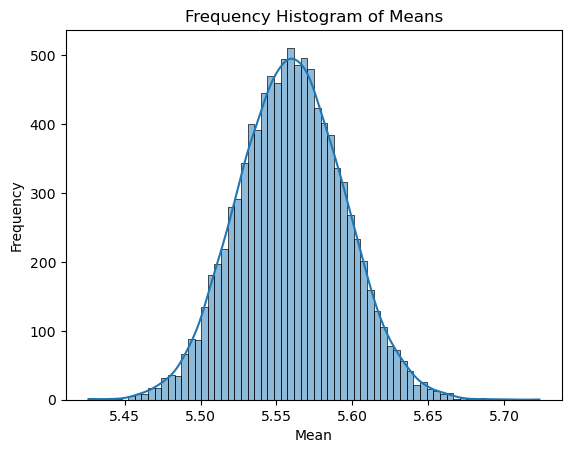

In [68]:
num_samples = 10000
num_repetitions = 10000

# List to store the means
mean_values = []

# Repeat the sampling process
for _ in range(num_repetitions):
    # Sample from the array with the given probabilities
    samples = np.random.choice(X, size=num_samples, p=p)
    # Calculate the mean of the samples and append to the list
    mean_values.append(np.mean(samples))

sns.histplot(mean_values, kde=True)
plt.title('Frequency Histogram of Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.show()


The resultant graph follows Normal distribution as a courtesy of CLT

In [69]:
mu = np.mean(mean_values)
sig = np.std(mean_values)

In [70]:
Y = [(mean_values[i]-mu)/sig for i in range(10000)]
print('mean is ',np.mean(Y))
print('standard deviation is', np.std(Y))

mean is  -1.4574652595911176e-14
standard deviation is 1.0


Hence, CLT is verified as \begin{equation*}
Y \to N(0,1)
\end{equation*}


**Q5)**
\begin{equation*}
f(x,y) = \begin{cases}
1, & 0 \leq x < \infty, \quad 0 \leq y \leq e^{-x} \\
0, & \text{otherwise}
\end{cases}
\end{equation*}

\begin{align*}
f_X(x) &= \int_{0}^{e^{-x}} f_{X,Y}(x,y) \, dy = \int_{0}^{e^{-x}} 1 \, dy = e^{-x} \\
f_Y(y) &= \int_{0}^{-\ln y} 1 \, dx = -\ln y \quad \text{if } y \leq e^{-x} \\
\therefore \, f_{X,Y}(x,y) &\neq f_X(x) \cdot f_Y(y)
\end{align*}

Conditional probability cannot be calculated. Instead we can calculate $f(y|x)$:

\begin{align*}
f(y|x) &= \frac{f_{X,Y}(x,y)}{f_X(x)} dx = \int_{0}^{-\ln y} \frac{1}{e^{-x}} dx = e^{-\ln y} - e^{0} = \frac{1 - y}{y}
\end{align*}

**Q7**
\begin{align*}
f(x,y) = \frac{1}{2\pi\sqrt{1-s^2}}e^{\left(-\frac{(x^2-2sxy+y^2)}{2(1-s^2)}\right)}
\end{align*}

\begin{align*}
f(x,y) &= c\exp\left(2\pi^2y^2(1-s^2)\right)\int_{-\infty}^{\infty}\exp(-t^2)\cdot\frac{dt}{\sqrt{2\pi c}} \\
&= c\exp(-2\pi^2y^2(1-s^2))\cdot\sqrt{\frac{\pi}{2\pi c}} \\
&= \frac{1}{\sqrt{2\pi}}\exp\left(-2\pi^2\cdot\frac{1}{4\pi^2(1-s^2)}y^2(1-s^2)\right) \\
&= \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y^2}{2}\right) \quad\Rightarrow\quad Y\sim N(0,1)
\end{align*}
Similarly, $X\sim N(0,1)$ as it is symmetric in $x$ and $y$.

Set $X=Z_1$ and $Y=Z_2\sqrt{1-s^2}+sZ_1$,
\begin{align*}
aX+bY &= (a+bs)Z_1 + b\sqrt{1-s^2}Z_2.
\end{align*}
Now, $Var(X)=Var(Y)=1$

\begin{align*}
Cov(X,Y) &= Cov\left(Z_1,sZ_1+\sqrt{1-s^2}Z_2\right) \\
&= s Cov(Z_1,Z_1) + \sqrt{1-s^2}Cov(Z_1,Z_2) \\
&= s\cdot 1 + \sqrt{1-s^2}\cdot 0 \\
&= s
\end{align*}
\begin{align*}
Corr(X^2,Y^2) &= \frac{Cov(X^2,Y^2)}{\sqrt{Var(X^2)Var(Y^2)}} \\
Cov(X^2,Y^2) &= E[X^2Y^2] - E[X^2]E[Y^2] \\
E[X^2Y^2] &= E\left[E(X^2Y^2|X)\right] = E\left[X^2E(Y^2|X)\right] \\
E(Y^2|X) &= Var(Y|X)+[E(Y|X)]^2
\end{align*}
And, $Y|X\sim N(sX,1-s^2)$
\begin{align*}
E[Y^2|X] &= (1-s^2)+s^2X^2 = 1+s^2(X^2-1) \\
E[X^2Y^2] &= E\left[X^2(1+s^2(X^2-1))\right]
\end{align*}

\begin{align*}
&= E\left[X^2-s^2X^2+s^2X^4\right] \\
&= (1-s^2)E[X^2]+s^2E[X^4] \\
&= (1-s^2)\cdot 1 + s^2(3) \\
&= 1+2s^2 \\
Cov(X^2,Y^2) &= (1+2s^2)-1 = +2s^2 \\
Corr(X^2,Y^2) &= \frac{2s^2}{\sqrt{2\cdot 2}} = s^2
\end{align*}